Sinusoid $ I(\mathbf{x}) = A \cos(\mathbf{\omega} \mathbf{x} + \rho) $

where
+ $ A $ is the amplitude
+ $ \rho $ is the phase
+ $ \mathbf{\omega} $ is the frequency.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def show_img(image, **kwargs):
    plt.figure()
    plt.axis('off')
    plt.imshow(image, cmap="Greys", **kwargs)

In [2]:
def y_sinusoid(size=(256,256), frequency=4):
    """
    Draw a sinusoidal grating that changes value across y axis.
    """
    x = np.arange(size[0])
    y = np.arange(size[1])
    X, Y = np.meshgrid(x, y)
    Z = np.sin(2 * np.pi * frequency * (Y / size[0]))
    return Z

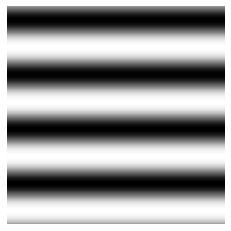

In [3]:
show_img(y_sinusoid())

In [4]:
np_sinegrate = y_sinusoid()

In [5]:
from scipy import ndimage
rotated_sinegrate = ndimage.rotate(np_sinegrate, 45, reshape=False)

In [6]:
from PIL import Image, ImageDraw, ImageFilter

In [7]:
pil_sinegrate = Image.fromarray(((rotated_sinegrate*127)+128).astype(np.uint8)) # convert [-1,1] to [0,255]

In [8]:
def mask_circle_solid(pil_img, background_color, blur_radius, offset=0):
    background = Image.new(pil_img.mode, pil_img.size, background_color)

    offset = blur_radius * 2 + offset
    mask = Image.new("L", pil_img.size, 0)
    draw = ImageDraw.Draw(mask)
    draw.ellipse((offset, offset, pil_img.size[0] - offset, pil_img.size[1] - offset), fill=255)
    mask = mask.filter(ImageFilter.GaussianBlur(blur_radius))

    return Image.composite(pil_img, background, mask)


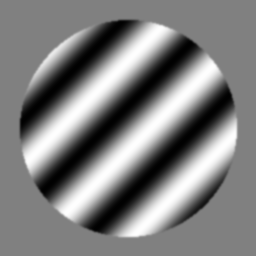

In [9]:
mask_circle_solid(pil_sinegrate, background_color=128, blur_radius=1, offset=18)

# Final Function to Create One Sinusoidal Grating

In [10]:
def circular_sinusoidal_grating(frequency, rotation, size):
    '''
    Generate a circular sinusoidal grating.
    
    frequency (float) : frequency of the sinusoid
    rotation (float) : counterclockwise rotation of the sinusoid in degrees
    size (int,int) : size of the output image
    '''
    np_sinegrate = y_sinusoid(size, frequency)
    rotated_sinegrate = ndimage.rotate(np_sinegrate, rotation, reshape=False)
    pil_sinegrate = Image.fromarray(((rotated_sinegrate*127)+128).astype(np.uint8)) # convert [-1,1] to [0,255]
    return mask_circle_solid(pil_sinegrate, background_color=128, blur_radius=1, offset=18)
   

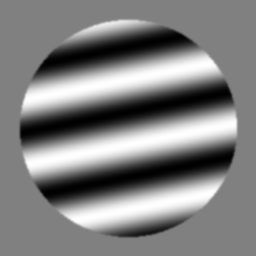

In [11]:
circular_sinusoidal_grating(frequency=4, rotation=11.1, size=(256,256))

In [12]:
from ipywidgets import interact
def demo_sinusoidal_grating(frequency, rotation):
    show_img(circular_sinusoidal_grating(frequency, rotation, size=(256,256)))
interact(demo_sinusoidal_grating, frequency=(1, 20, 0.1), rotation=(0, 180, 1))

interactive(children=(FloatSlider(value=10.0, description='frequency', max=20.0, min=1.0), IntSlider(value=90,…

<function __main__.demo_sinusoidal_grating(frequency, rotation)>

# Generating a Set of Sinusoidal Gratings According to Rule-based and Information-Integration Categories

Strategy:
+ Draw a 2d probability density map as a bitmap
+ Iteratively pick a random point in the bitmap in accordance with the probability density map

From the literature:

Each stimulus was defined by a pair (x_1, x_2) sampled from an arbitrary 100x100 stimulus space and converted to a disk using the following equations:
+ frequency: x_1 / 30 + 0.25cpd
+ orientation: 9 * x_2 / 10 + 20deg 

This yielded stimuli that varied in orientation from 20 to 110 deg (counterclockwise from horizontal) and in frequency between 0.25 and 3.58 cpd.

The output stimulus occupied an approximate visual angle of 5 deg. They were shown on a grey background.

For the Rule Based condition, category "A" stimuli were generated using two multivariate distributions with the following parameters: 
+ u_a1 = {30,50}
+ sigma_a1 = {10,0; 0,150}
+ u_a2 = {50,70}
+ sigma_a2 = {150, 0; 0,10}

A similar sampling method was used for the category "B" stimuli.
+ u_b1 = {50,30}
+ u_b2 = {70,50}
+ sigma_b1 = sigma_a1
+ sigma_b2 = sigma_a2

For the Information Integration condition, category "A" stimuli were generated using two multivariate distributions with the following parameters:

+ u_a = {40,50}
+ sigma_a = {10,0; 0,280}

The same sampling method was used for "B" stimuli

+ u_b = {60,50}
+ sigma_b = sigma_a

Then, the resulting stimuli were rotated 45 degrees counterclockwise around the center point of stimulus space

In [13]:
import scipy.stats
import numpy as np

# random seed
#np.random.seed(seed=341)

rb_a1_dis = scipy.stats.multivariate_normal.rvs(mean=[30,50], cov=[[10,0],[0,150]], size=100)
rb_a2_dis = scipy.stats.multivariate_normal.rvs(mean=[50,70], cov=[[150,0],[0,10]], size=100)
rb_b1_dis = scipy.stats.multivariate_normal.rvs(mean=[50,30], cov=[[10,0],[0,150]], size=100)
rb_b2_dis = scipy.stats.multivariate_normal.rvs(mean=[70,50], cov=[[150,0],[0,10]], size=100)

In [14]:
def freq_transform(x):
    return x / 30 + 0.25 # cpd
def orient_transform(y):
    return np.deg2rad((9/10 * y) + 20) # rad

In [15]:
freq_transform(10)

0.5833333333333333

In [16]:
rb_a1_params = np.array([[freq_transform(x), orient_transform(y)] for x,y in rb_a1_dis])
rb_a2_params = np.array([[freq_transform(x), orient_transform(y)] for x,y in rb_a2_dis])
rb_b1_params = np.array([[freq_transform(x), orient_transform(y)] for x,y in rb_b1_dis])
rb_b2_params = np.array([[freq_transform(x), orient_transform(y)] for x,y in rb_b2_dis])

([<matplotlib.axis.XTick at 0x7f2d871814c0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

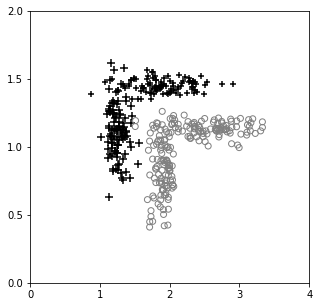

In [17]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (5, 5)
plt.scatter(rb_a1_params[:,0], rb_a1_params[:,1], s=60, marker='+', color='black')
plt.scatter(rb_a2_params[:,0], rb_a2_params[:,1], marker='+', color='black')
plt.scatter(rb_b1_params[:,0], rb_b1_params[:,1], facecolors='none', edgecolors='gray')
plt.scatter(rb_b2_params[:,0], rb_b2_params[:,1], facecolors='none', edgecolors='gray')
plt.axis([0.0, 4.0, 0.0, 1.6])
plt.yticks(np.arange(0, 2.1, 0.5))
plt.xticks(np.arange(0,4.1,1))

In [18]:
# random seed
#np.random.seed(seed=1995)

ii_a_dis = scipy.stats.multivariate_normal.rvs(mean=[40,50], cov=[[10,0],[0,280]], size=100)
ii_b_dis = scipy.stats.multivariate_normal.rvs(mean=[60,50], cov=[[10,0],[0,280]], size=100)

In [19]:
def rotate_points_around_center(points, angle):
    """
    Rotate a set of points around the center of mass of points
    """
    center = np.mean(points, axis=0)
    rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)],
                                [np.sin(angle), np.cos(angle)]])
    return np.dot(points - center, rotation_matrix) + center


In [20]:
ii_a_rotated = rotate_points_around_center(ii_a_dis, np.pi/4)
ii_b_rotated = rotate_points_around_center(ii_b_dis, np.pi/4)

In [21]:
ii_a_params = np.array([[freq_transform(x), orient_transform(y)] for x,y in ii_a_rotated])
ii_b_params = np.array([[freq_transform(x), orient_transform(y)] for x,y in ii_b_rotated])

([<matplotlib.axis.XTick at 0x7f2d87106a00>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

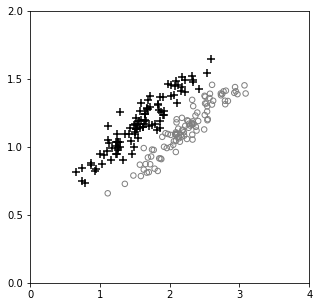

In [22]:
plt.scatter(ii_a_params[:,0], ii_a_params[:,1], s=60, marker='+', color='black')
plt.scatter(ii_b_params[:,0], ii_b_params[:,1], s=30, facecolors='none', edgecolors='gray')
plt.axis([0.0, 4.0, 0.0, 1.6])
plt.yticks(np.arange(0, 2.1, 0.5))
plt.xticks(np.arange(0,4.1,1))

In [23]:
np.rad2deg(max(ii_a_params[:,1]))

94.24012230220652

In [24]:
np.rad2deg(min(ii_a_params[:,1]))

42.08642167360008

/tmp/ipykernel_186758/3905402497.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


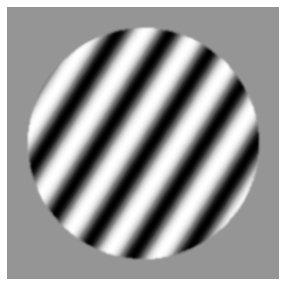

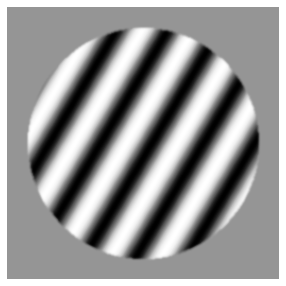

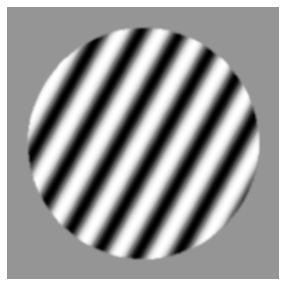

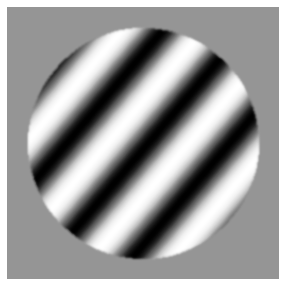

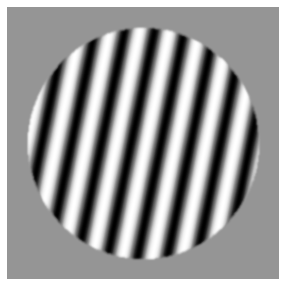

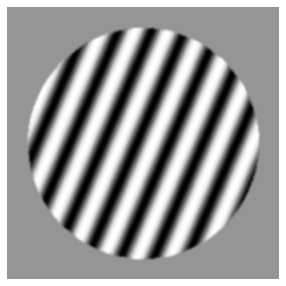

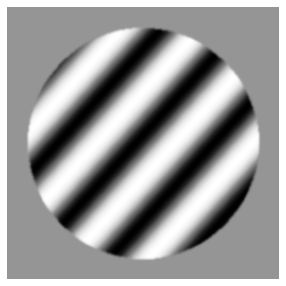

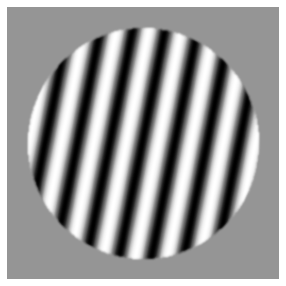

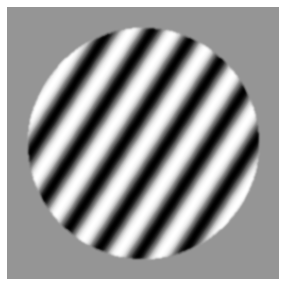

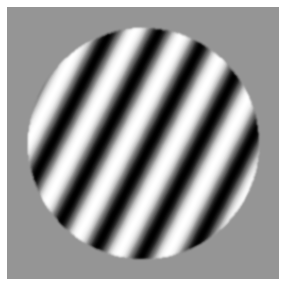

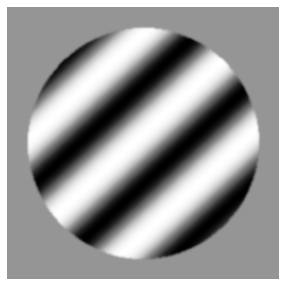

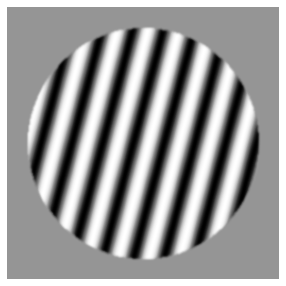

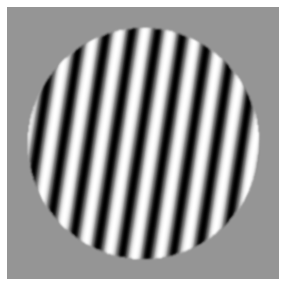

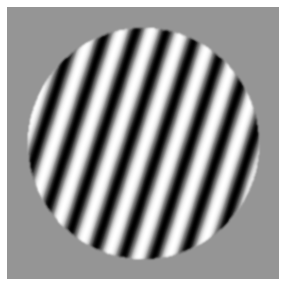

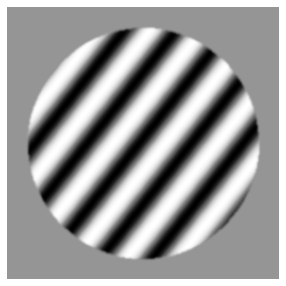

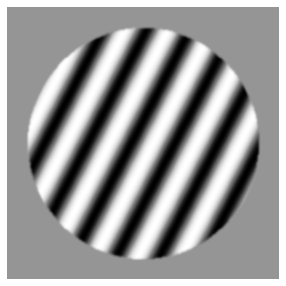

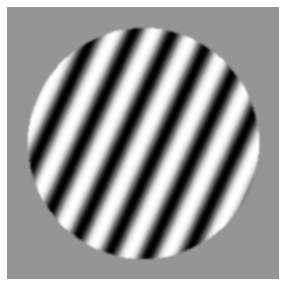

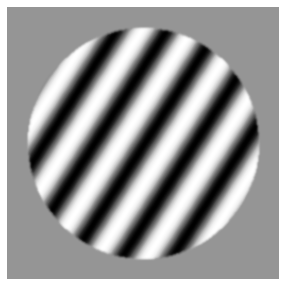

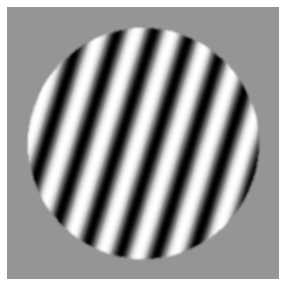

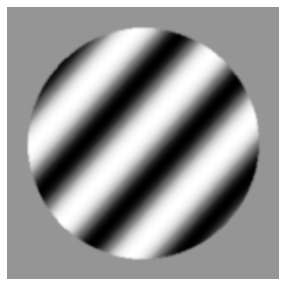

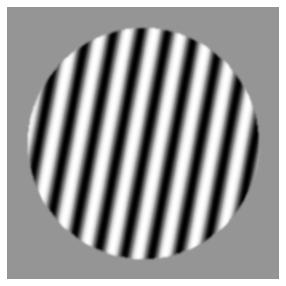

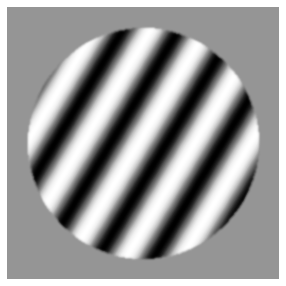

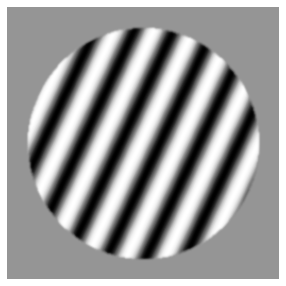

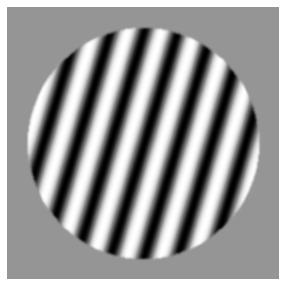

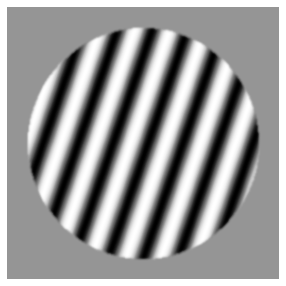

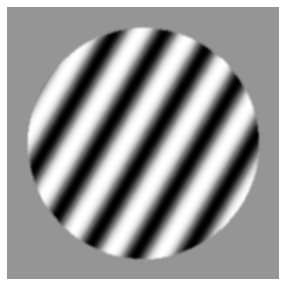

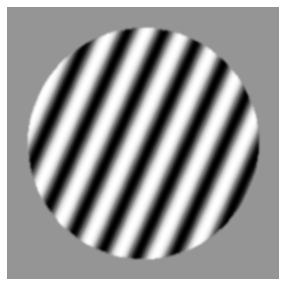

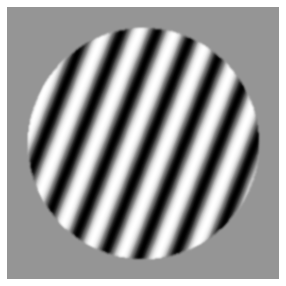

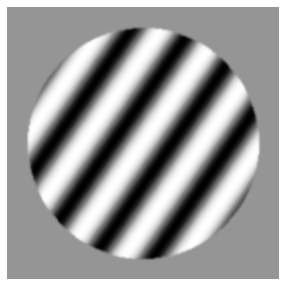

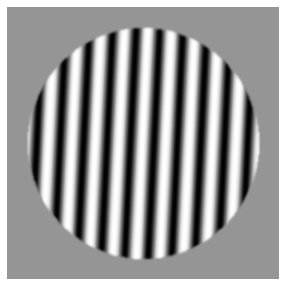

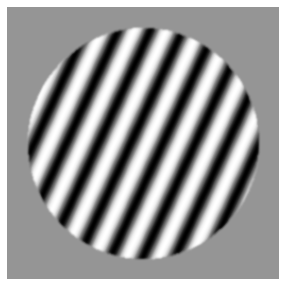

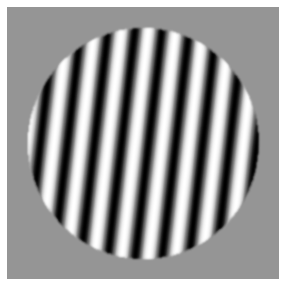

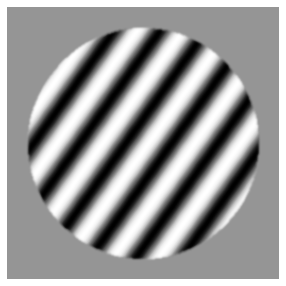

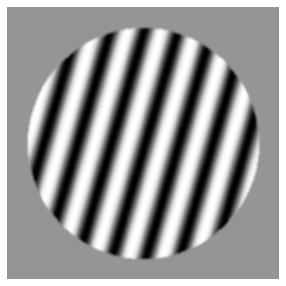

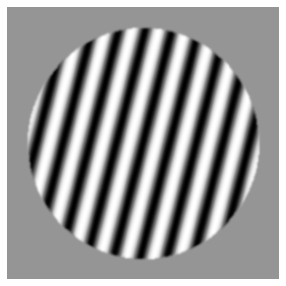

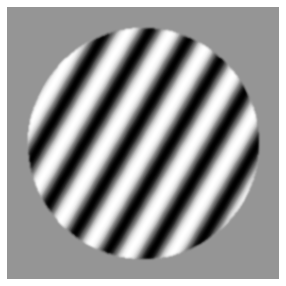

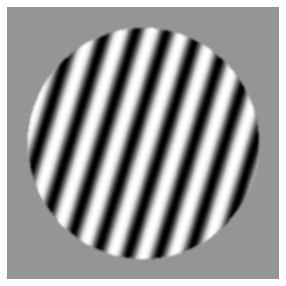

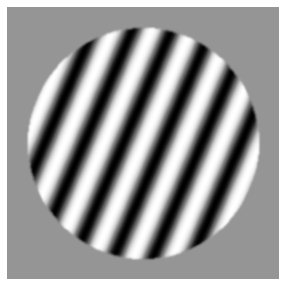

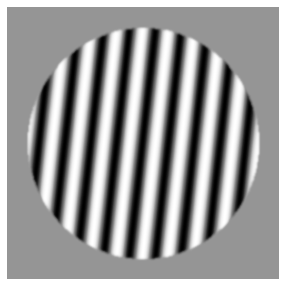

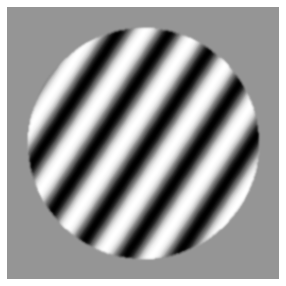

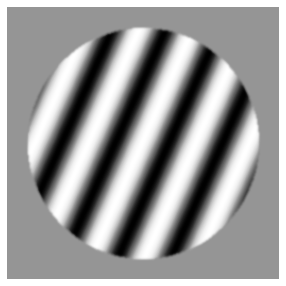

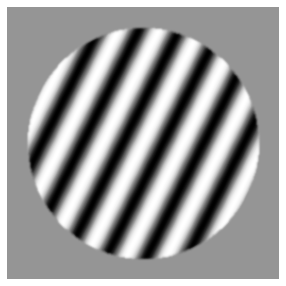

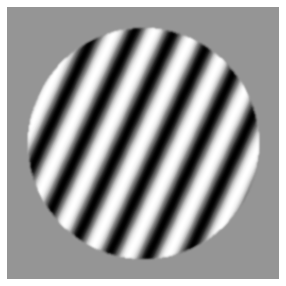

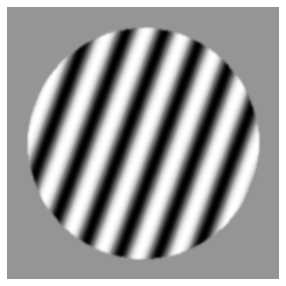

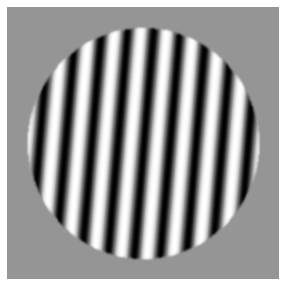

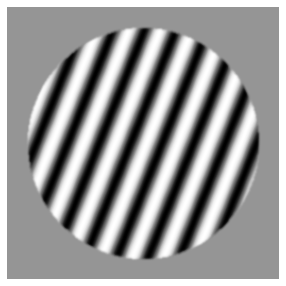

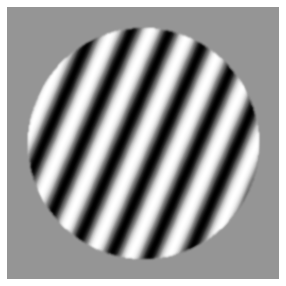

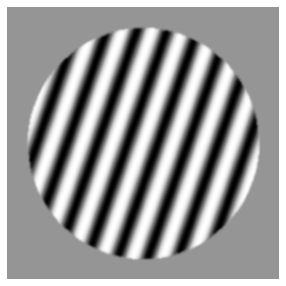

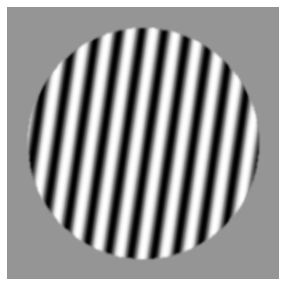

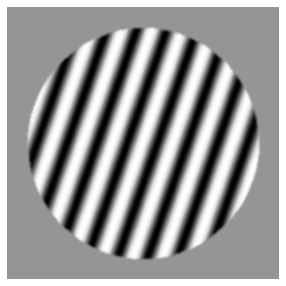

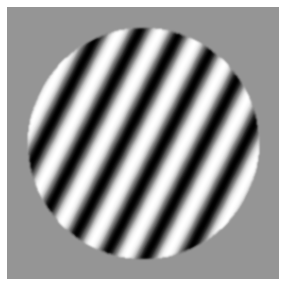

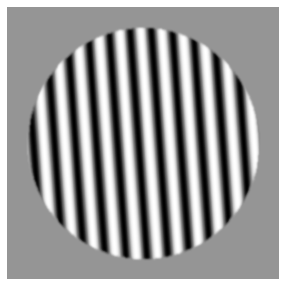

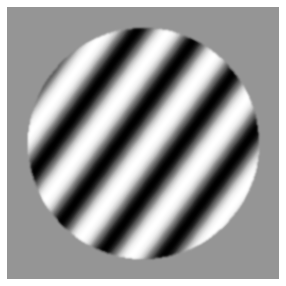

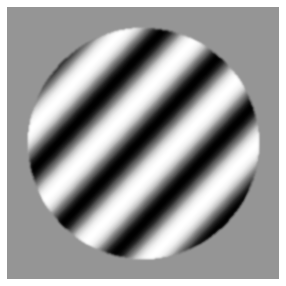

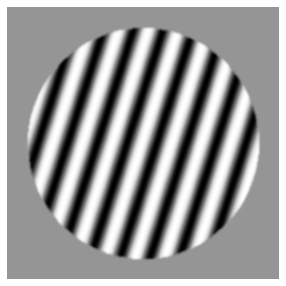

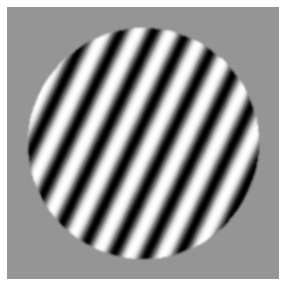

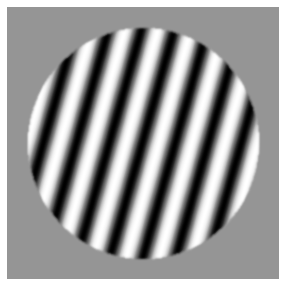

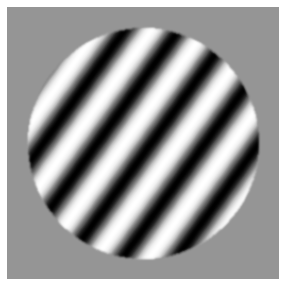

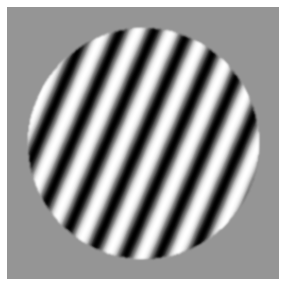

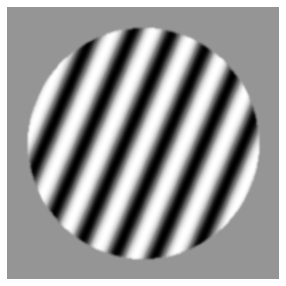

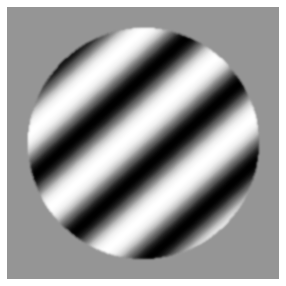

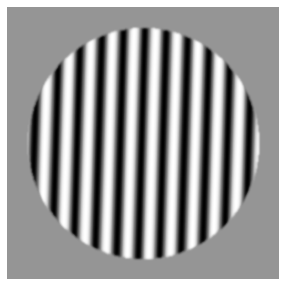

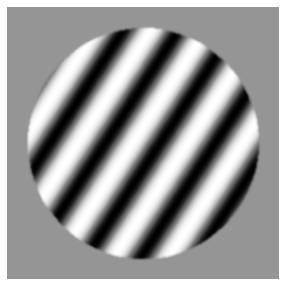

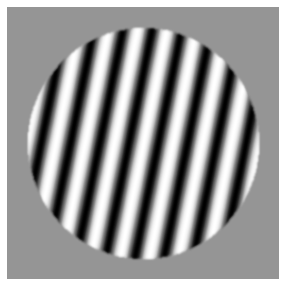

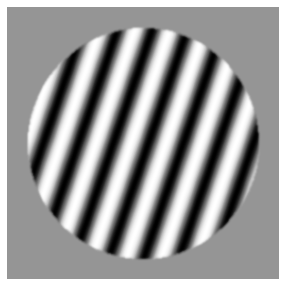

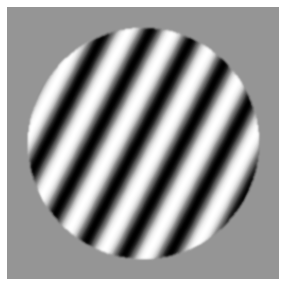

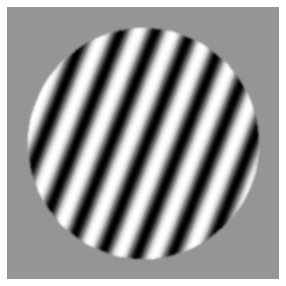

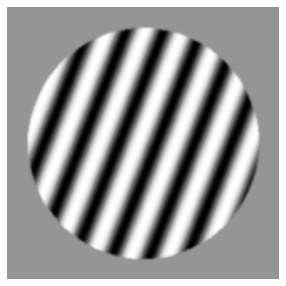

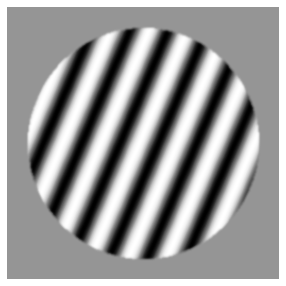

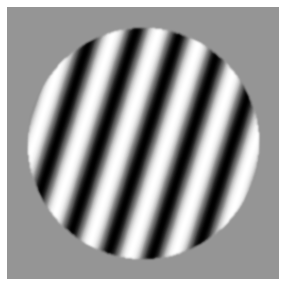

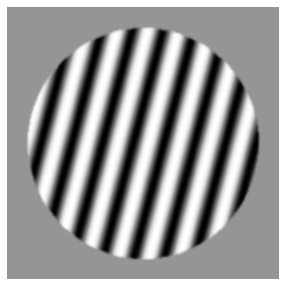

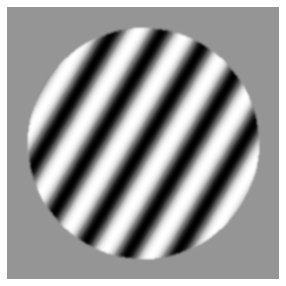

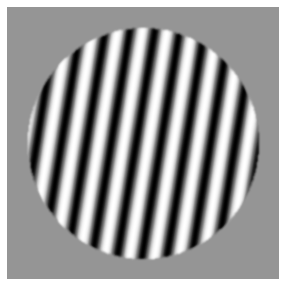

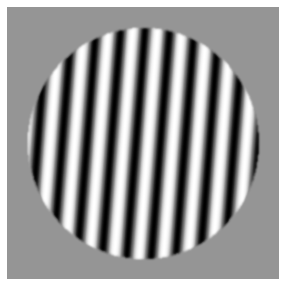

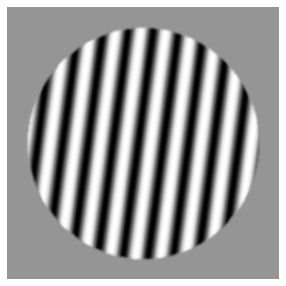

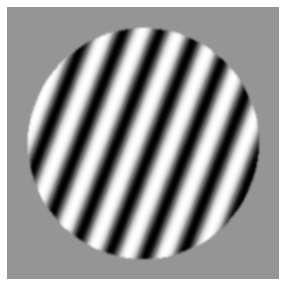

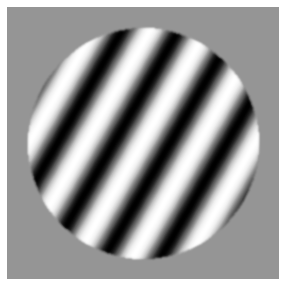

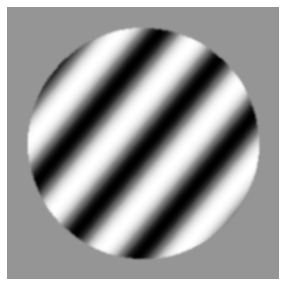

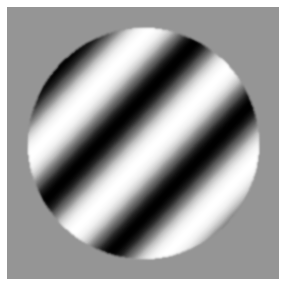

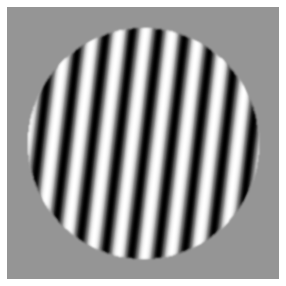

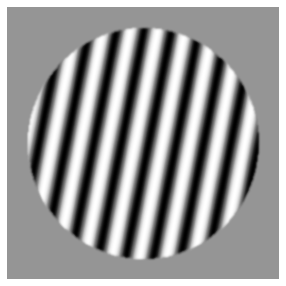

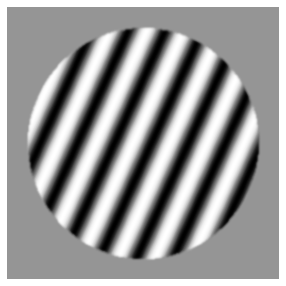

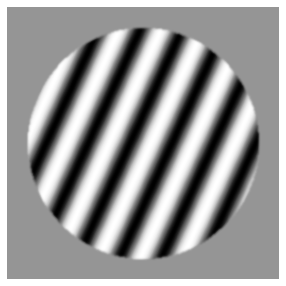

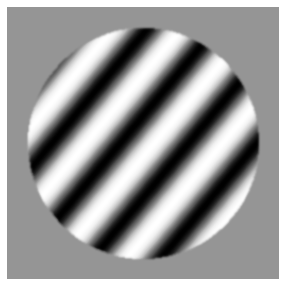

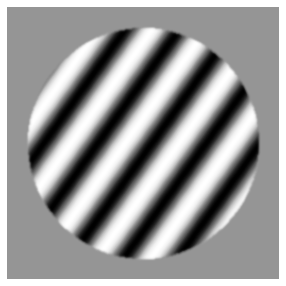

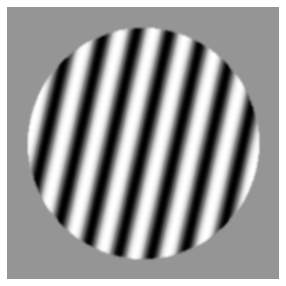

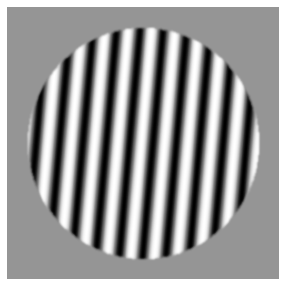

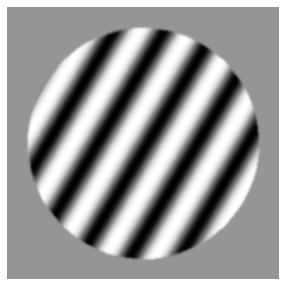

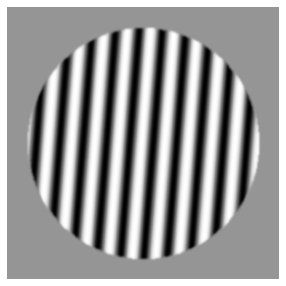

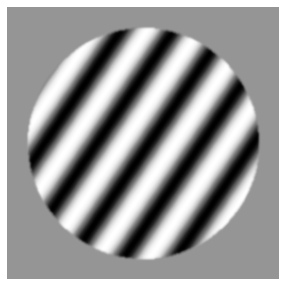

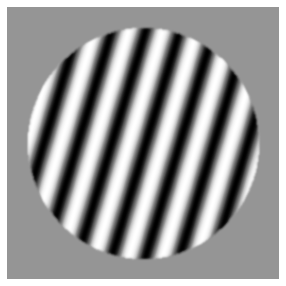

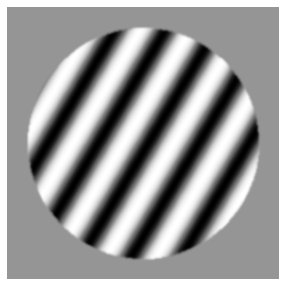

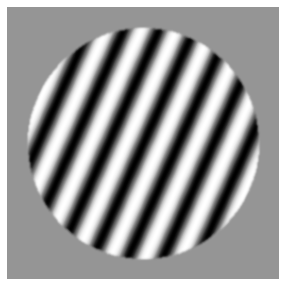

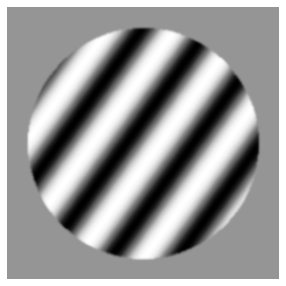

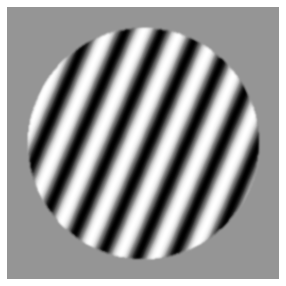

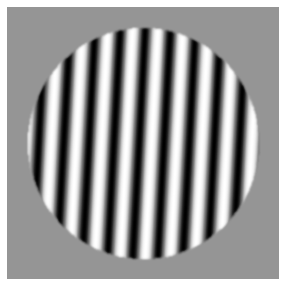

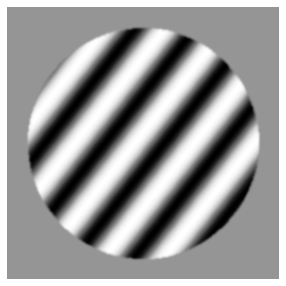

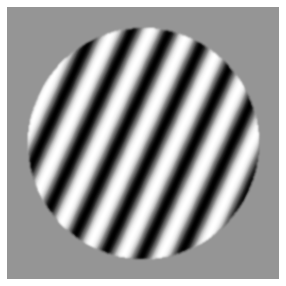

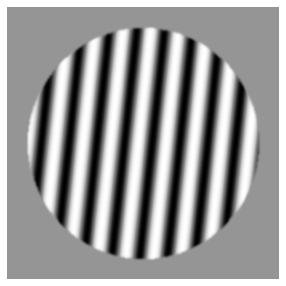

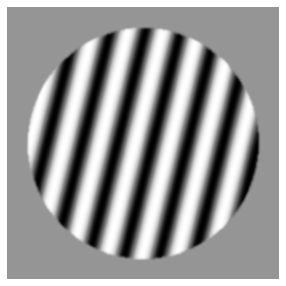

In [25]:
dataset = []
visual_angle = 5
for freq, orient in ii_a_params:
    freq *= visual_angle # convert cpd (cycles per degree) to frequency across image
    orient = np.rad2deg(orient)
    show_img(circular_sinusoidal_grating(freq, orient, size=(256,256)))
    #dataset.append(circular_sinusoidal_grating(freq, orient, size=(256,256))) # append to list of PIL.Image.Image objects